In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()


In [516]:
df= pd.read_csv('CarPrice_Assignment (1).csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [517]:
y=df['price']

In [518]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [519]:
df.drop('car_ID',axis=1,inplace=True)

In [520]:
df['CarName'] = df['CarName'].apply(lambda x: x.lower().split(' ')[0])

In [521]:
name = {}
name['maxda'] = 'mazda'
name['porcshce']='porsche'
name['toyouta'] = 'toyota'
name['vw'] = 'volkswagen'
name['vokswagen'] = 'volkswagen'

In [522]:
for k,v in name.items():
    df['CarName'] = df['CarName'].replace(k,v)

In [523]:
objs=df.select_dtypes('O').columns
flts=[col for col in df.columns if col not in objs]

In [524]:
flts.remove('price')

In [525]:
Y=df[flts]
Y

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [526]:
X=df[objs]

In [527]:
X

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [528]:
feature=pd.concat([Y,y],axis=1).corr()['price'].abs().sort_values(ascending=False)[1:]

In [529]:
selected_features=feature[feature>0.5]
selected_features

enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
highwaympg    0.697599
citympg       0.685751
carlength     0.682920
wheelbase     0.577816
boreratio     0.553173
Name: price, dtype: float64

In [530]:
X_=pd.get_dummies(X,drop_first=True)

In [531]:
X_

,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [532]:
df_concat=df.select_dtypes('O').columns
df_num=[col for col in df.columns if col not in objs]

In [533]:
df_num = df[df_num]

In [534]:
df_num1=df_num.copy(deep=True)
df_num1.drop(['price'],axis=1,inplace=True)

In [535]:
FF= pd.concat([X_,df_num1],axis=1)

In [536]:
FF

,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [537]:
x_train,x_test,y_train,y_test = train_test_split(FF,y,test_size=0.2,random_state =1)

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = Ridge(alpha=1.5)
result = model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


print('Train performance:-')
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2= r2_score(y_train,y_train_pred)
print(f'RMSE : {rmse}, R2 : {r2}')

print('Test performance:-')
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2= r2_score(y_test,y_test_pred)
print(f'RMSE : {rmse}, R2 :{r2}')

Train performance:-
RMSE : 1593.0436504943805, R2 : 0.9611077083682944
Test performance:-
RMSE : 2646.0254944748776, R2 :0.8725862834743318


Text(0.5, 0, 'Index')

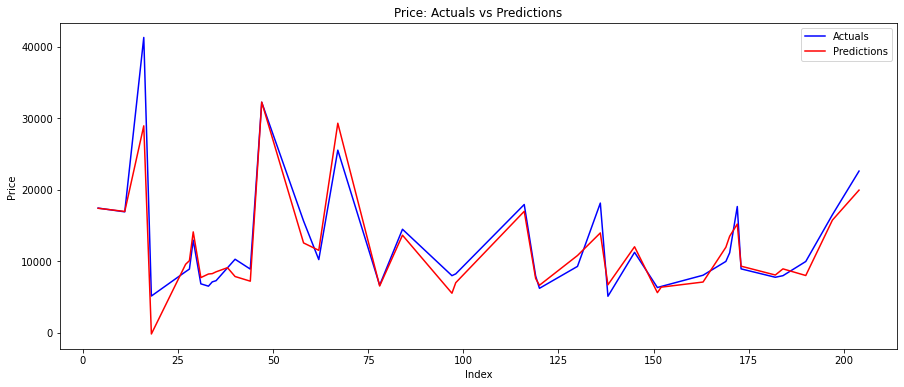

In [538]:
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_test_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

## DECISION TREE WITH NO PARAMS

In [539]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeRegressor


In [540]:
x_train,x_test,y_train,y_test = train_test_split(FF,y,test_size=0.2,random_state =1)


model =DecisionTreeRegressor( criterion='squared_error',splitter='best',max_depth=10,min_samples_split=2,random_state=1)

model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=1)

In [541]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


print('Train performance:-')
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2= r2_score(y_train,y_train_pred)
print(f'RMSE : {rmse}, R2 : {r2}')

print('Test performance:-')
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2= r2_score(y_test,y_test_pred)
print(f'RMSE : {rmse}, R2 :{r2}')

Train performance:-
RMSE : 356.76562100815335, R2 : 0.9980493732420933
Test performance:-
RMSE : 2379.301050552429, R2 :0.8969787232264832


## BUILDING THE MODEL WITH BEST PARAMS

In [542]:
params= {}
params['max_depth'] = [7,8,9,10]
params['min_samples_split'] = [2,3,5]
params['criterion'] = ['squared_error','friedman_mse']

In [543]:
grid_model = GridSearchCV(DecisionTreeRegressor(),param_grid=params,cv=5,scoring='neg_mean_squared_error',verbose=1)

In [544]:
grid_model.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [7, 8, 9, 10],
                         'min_samples_split': [2, 3, 5]},
             scoring='neg_mean_squared_error', verbose=1)

In [545]:
grid_model.best_params_

{'criterion': 'friedman_mse', 'max_depth': 7, 'min_samples_split': 2}

In [624]:
x_train,x_test,y_train,y_test = train_test_split(FF,y,test_size=0.2,random_state =1)


model =DecisionTreeRegressor( criterion='friedman_mse',max_depth=7,min_samples_split=2,random_state=1)

model.fit(x_train,y_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=7, random_state=1)

In [625]:
np.sqrt(-1.0*grid_model.best_score_)

2641.4973383756833

In [626]:
y_train_pred = grid_model.predict(x_train)
y_test_pred = grid_model.predict(x_test)


print('Train performance:-')
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2= r2_score(y_train,y_train_pred)
print(f'RMSE : {rmse}, R2 : {r2}')

print('Test performance:-')
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2= r2_score(y_test,y_test_pred)
print(f'RMSE : {rmse}, R2 :{r2}')

Train performance:-
RMSE : 673.3574555382461, R2 : 0.9930513645459371
Test performance:-
RMSE : 2723.7722723367415, R2 :0.8649888227380734


## MODEL WITH BEST FEATURES

In [627]:
feature_importance= pd.DataFrame(zip(x_train.columns,grid_model.best_estimator_.feature_importances_),columns=['Features','Importance'])

In [628]:
pd.set_option('display.max_columns',None)

In [629]:

feature_importance=feature_importance.sort_values('Importance',ascending=False)

In [630]:
feature_importance

,Features,Importance
56,enginesize,0.691351
55,curbweight,0.217480
60,horsepower,0.034989
63,highwaympg,0.019444
53,carwidth,0.009749
...,...,...
30,enginelocation_rear,0.000000
31,enginetype_dohcv,0.000000
1,CarName_bmw,0.000000
33,enginetype_ohc,0.000000


In [631]:
drop = feature_importance[feature_importance['Importance']>0]

In [632]:
drop.shape

(24, 2)

In [633]:
drop['Features'].unique()

array(['enginesize', 'curbweight', 'horsepower', 'highwaympg', 'carwidth',
       'peakrpm', 'carlength', 'compressionratio', 'cylindernumber_six',
       'wheelbase', 'symboling', 'boreratio', 'carheight',
       'doornumber_two', 'carbody_sedan', 'carbody_hardtop', 'stroke',
       'citympg', 'CarName_isuzu', 'cylindernumber_five',
       'CarName_toyota', 'carbody_wagon', 'CarName_volkswagen',
       'cylindernumber_four'], dtype=object)

In [634]:
FF1=FF[['enginesize', 'curbweight', 'horsepower', 'highwaympg', 'carwidth',
       'fuelsystem_idi', 'carlength', 'peakrpm', 'compressionratio',
       'wheelbase', 'boreratio', 'stroke', 'enginetype_ohcf', 'symboling',
       'carheight', 'fuelsystem_2bbl', 'carbody_hardtop',
       'carbody_hatchback', 'citympg', 'CarName_renault',
       'CarName_mercury', 'CarName_isuzu', 'doornumber_two',
       'carbody_sedan', 'CarName_toyota', 'carbody_wagon']]

In [635]:
FF1.shape

(205, 26)

In [636]:
x_train,x_test,y_train,y_test = train_test_split(FF1,y,test_size=0.2,random_state =1)

model =DecisionTreeRegressor( criterion='squared_error',max_depth=10,min_samples_split=2,random_state=1)

model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=1)

Cross Val Score  mean:0.865653417229578 std: 0.029252535152084445


<AxesSubplot:>

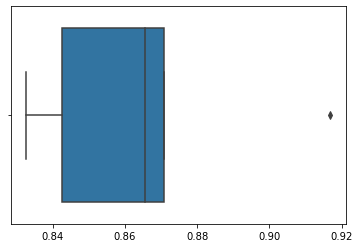

In [637]:
val_score = cross_val_score(model,x_train,y_train,cv=5)
print(f'Cross Val Score  mean:{np.mean(val_score)} std: {np.std(val_score)}')
sns.boxplot(np.array(val_score))


##  DECISION TREE  WITH FEATURE IMPORTANCE

In [638]:
x_train,x_test,y_train,y_test = train_test_split(FF1,y,test_size=0.2,random_state =1)


model =DecisionTreeRegressor( criterion='squared_error',max_depth=10,min_samples_split=2,random_state=1)

model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=1)

In [639]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


print('Train performance:-')
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2= r2_score(y_train,y_train_pred)
print(f'RMSE : {rmse}, R2 : {r2}')

print('Test performance:-')
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2= r2_score(y_test,y_test_pred)
print(f'RMSE : {rmse}, R2 :{r2}')

Train performance:-
RMSE : 356.44031216770554, R2 : 0.9980529288920127
Test performance:-
RMSE : 2424.3417301456793, R2 :0.8930413754754001


In [640]:
cross_val=cross_val_score(model,x_train,y_train,scoring='r2')
print(f'Cross Val Score  mean:{np.mean(val_score)} std: {np.std(val_score)}')

Cross Val Score  mean:0.865653417229578 std: 0.029252535152084445


In [641]:
cross_val=cross_val_score(model,x_test,y_test,scoring='r2')
print(f'Cross Val Score  mean:{np.mean(val_score)} std: {np.std(val_score)}')

Cross Val Score  mean:0.865653417229578 std: 0.029252535152084445


In [642]:
params= {}
params['max_depth'] = [7,8,9,10,11,12,13,14,15]
params['min_samples_split'] = [2,3,5,7,9,11]
params['criterion'] = ['squared_error','friedman_mse']

In [643]:
grid_model_2 = GridSearchCV(DecisionTreeRegressor(),param_grid=params,cv=5,scoring='neg_mean_squared_error',verbose=1)

In [644]:
grid_model_2.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'min_samples_split': [2, 3, 5, 7, 9, 11]},
             scoring='neg_mean_squared_error', verbose=1)

In [645]:
grid_model_2.best_params_

{'criterion': 'friedman_mse', 'max_depth': 12, 'min_samples_split': 9}

In [649]:
x_train,x_test,y_train,y_test = train_test_split(FF1,y,test_size=0.2,random_state =1)


model_2 =DecisionTreeRegressor( criterion='friedman_mse',max_depth=12,min_samples_split=11)

model_2.fit(x_train,y_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=12,
                      min_samples_split=11)

In [650]:
np.sqrt(-1.0*grid_model_2.best_score_)

2504.874337746867

In [651]:
y_train_pred = model_2.predict(x_train)
y_test_pred = model_2.predict(x_test)


print('Train performance:-')
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2= r2_score(y_train,y_train_pred)
print(f'RMSE : {rmse}, R2 : {r2}')

print('Test performance:-')
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2= r2_score(y_test,y_test_pred)
print(f'RMSE : {rmse}, R2 :{r2}')

Train performance:-
RMSE : 1166.9959451123013, R2 : 0.9791288261402677
Test performance:-
RMSE : 2235.4026191125045, R2 :0.9090632045116034


In [652]:
cross_val=cross_val_score(model,x_train,y_train,scoring='r2')
print(f'Cross Val Score  mean:{np.mean(val_score)} std: {np.std(val_score)}')

Cross Val Score  mean:0.865653417229578 std: 0.029252535152084445


In [653]:
r2

0.9090632045116034

Text(0.5, 0, 'Index')

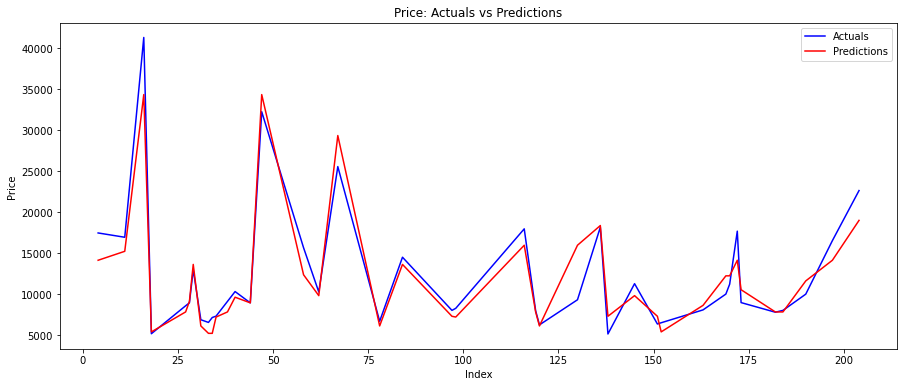

In [654]:
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_test_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

## MODEL WITH RANDOM FOREST 

In [655]:
from sklearn.ensemble import RandomForestRegressor

In [656]:
x_train,x_test,y_train,y_test = train_test_split(FF1,y,test_size=0.2,random_state =1)


model_3 =RandomForestRegressor(n_estimators=10,random_state=1)
model_3.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10, random_state=1)

In [657]:
y_train_pred = model_3.predict(x_train)
y_test_pred = model_3.predict(x_test)


print('Train performance:-')
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2= r2_score(y_train,y_train_pred)
print(f'RMSE : {rmse}, R2 : {r2}')

print('Test performance:-')
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2= r2_score(y_test,y_test_pred)
print(f'RMSE : {rmse}, R2 :{r2}')

Train performance:-
RMSE : 1016.5276757967664, R2 : 0.9841639597806371
Test performance:-
RMSE : 2471.6463982855407, R2 :0.8888266189532726


In [658]:
params= {}
params['max_depth'] = [7,8,9,10,11,12,13,14,15]
params['min_samples_split'] = [2,3,5,7,9,11]
params['criterion'] = ['squared_error','friedman_mse']

In [659]:
grid_model_3 = GridSearchCV(RandomForestRegressor(),param_grid=params,cv=5,scoring='neg_mean_squared_error',verbose=1)

In [660]:
grid_model_3.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'min_samples_split': [2, 3, 5, 7, 9, 11]},
             scoring='neg_mean_squared_error', verbose=1)

In [661]:
grid_model_3.best_params_

{'criterion': 'friedman_mse', 'max_depth': 15, 'min_samples_split': 3}

## RANDOM FOREST WITH BEST PARAMS WITH FEATURE IMPORTANCE

In [686]:
x_train,x_test,y_train,y_test = train_test_split(FF1,y,test_size=0.2,random_state =1)


model_4 =RandomForestRegressor( criterion='friedman_mse',max_depth=15,min_samples_split=3)

model_4.fit(x_train,y_train)

##  model_4 =RandomForestRegressor( criterion='squared_error',max_depth=7,min_samples_split=5)

RandomForestRegressor(criterion='friedman_mse', max_depth=15,
                      min_samples_split=3)

In [687]:
y_train_pred = model_4.predict(x_train)
y_test_pred = model_4.predict(x_test)


print('Train performance:-')
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2= r2_score(y_train,y_train_pred)
print(f'RMSE : {rmse}, R2 : {r2}')

print('Test performance:-')
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2= r2_score(y_test,y_test_pred)
print(f'RMSE : {rmse}, R2 :{r2}')

Train performance:-
RMSE : 864.9788670362746, R2 : 0.9885338088956476
Test performance:-
RMSE : 2231.4690917121284, R2 :0.909382956898142


Text(0.5, 0, 'Index')

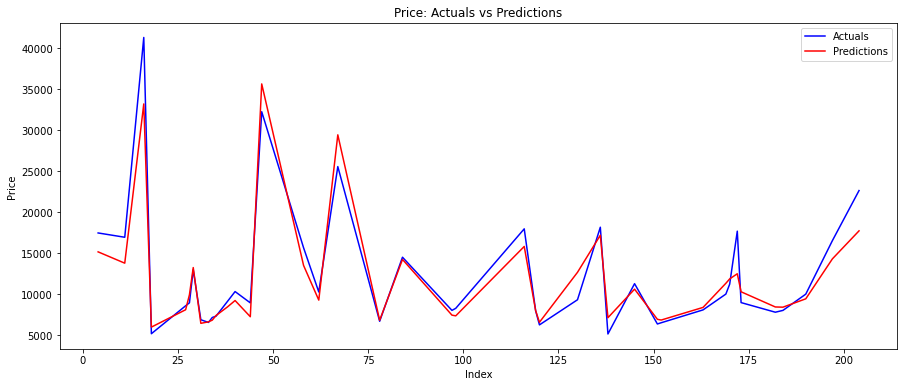

In [688]:
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_test_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

## RANDOM FOREST FEATURE IMPORTANCE PART 2

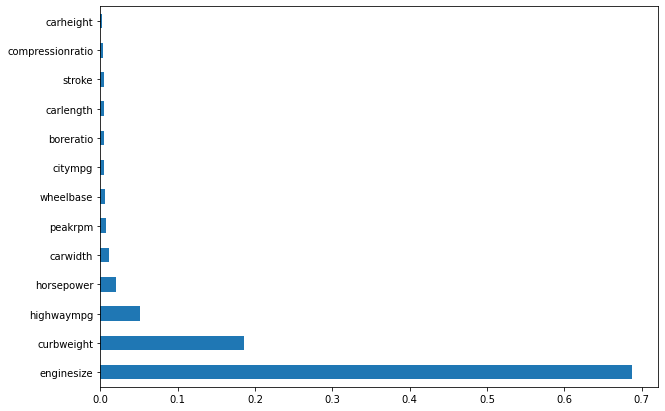

In [585]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_4.feature_importances_, index = x_train.columns)
feat_importances.nlargest(13).plot(kind='barh');

In [586]:
FF2=FF[['enginesize', 'curbweight', 'horsepower', 'highwaympg', 'carwidth','citympg',
       'carlength', 'peakrpm', 'compressionratio',
       'wheelbase', 'boreratio', 'stroke','carheight']]

In [587]:
FF2['mean_mpg'] = FF2[['highwaympg', 'citympg']].mean(axis=0,inplace=True)
FF2

TypeError: mean() got an unexpected keyword argument 'inplace'

In [588]:
FF2.drop(['citympg','highwaympg'],axis=1).round()

,enginesize,curbweight,horsepower,carwidth,carlength,peakrpm,compressionratio,wheelbase,boreratio,stroke,carheight
0,130,2548,111,64.0,169.0,5000,9.0,89.0,3.0,3.0,49.0
1,130,2548,111,64.0,169.0,5000,9.0,89.0,3.0,3.0,49.0
2,152,2823,154,66.0,171.0,5000,9.0,94.0,3.0,3.0,52.0
3,109,2337,102,66.0,177.0,5500,10.0,100.0,3.0,3.0,54.0
4,136,2824,115,66.0,177.0,5500,8.0,99.0,3.0,3.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...
200,141,2952,114,69.0,189.0,5400,10.0,109.0,4.0,3.0,56.0
201,141,3049,160,69.0,189.0,5300,9.0,109.0,4.0,3.0,56.0
202,173,3012,134,69.0,189.0,5500,9.0,109.0,4.0,3.0,56.0
203,145,3217,106,69.0,189.0,4800,23.0,109.0,3.0,3.0,56.0


In [589]:
FF2['mean_mpg'].isnull().sum()

KeyError: 'mean_mpg'

In [590]:
FF2.isnull().sum()

enginesize          0
curbweight          0
horsepower          0
highwaympg          0
carwidth            0
citympg             0
carlength           0
peakrpm             0
compressionratio    0
wheelbase           0
boreratio           0
stroke              0
carheight           0
dtype: int64

In [594]:
FF3=FF[['enginesize', 'curbweight', 'horsepower', 'highwaympg', 'carwidth','citympg',
       'carlength', 'peakrpm', 'compressionratio',
       'wheelbase', 'boreratio', 'stroke','carheight']]

In [595]:
FF3['add_mpg']=FF3['highwaympg']+FF3['citympg']

In [596]:
FF3['mean1_mpg']=FF3['add_mpg']/2

In [597]:
FF3.drop(['highwaympg','citympg','add_mpg'],axis=1,inplace=True)

In [667]:
x_train,x_test,y_train,y_test = train_test_split(FF3,y,test_size=0.2,random_state =1)


model_5 =RandomForestRegressor(n_estimators=10,random_state=1)
model_5.fit(x_train,y_train)


grid_model_5 = GridSearchCV(RandomForestRegressor(),param_grid=params,cv=5,scoring='neg_mean_squared_error',verbose=1)


grid_model_5.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'min_samples_split': [2, 3, 5, 7, 9, 11]},
             scoring='neg_mean_squared_error', verbose=1)

In [668]:
grid_model_5.best_params_

{'criterion': 'friedman_mse', 'max_depth': 7, 'min_samples_split': 3}

In [675]:
x_train,x_test,y_train,y_test = train_test_split(FF3,y,test_size=0.2,random_state =1)


model_6 =RandomForestRegressor( criterion='friedman_mse',max_depth=7,min_samples_split=5)

model_6.fit(x_train,y_train)

## model_6 =RandomForestRegressor( criterion='friedman_mse',max_depth=7,min_samples_split=3)

RandomForestRegressor(criterion='friedman_mse', max_depth=7,
                      min_samples_split=5)

In [678]:
y_train_pred = model_6.predict(x_train)
y_test_pred = model_6.predict(x_test)


print('Train performance:-')
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2= r2_score(y_train,y_train_pred)
print(f'RMSE : {rmse}, R2 : {r2}')

print('Test performance:-')
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2= r2_score(y_test,y_test_pred)
print(f'RMSE : {rmse}, R2 :{r2}')

Train performance:-
RMSE : 1078.8120261291583, R2 : 0.9821639065124605
Test performance:-
RMSE : 2204.7149028951703, R2 :0.9115428361549274


In [679]:
cross_val=cross_val_score(model,x_train,y_train,scoring='r2')
print(f'Cross Val Score  mean:{np.mean(val_score)} std: {np.std(val_score)}')

Cross Val Score  mean:0.865653417229578 std: 0.029252535152084445


Text(0.5, 0, 'Index')

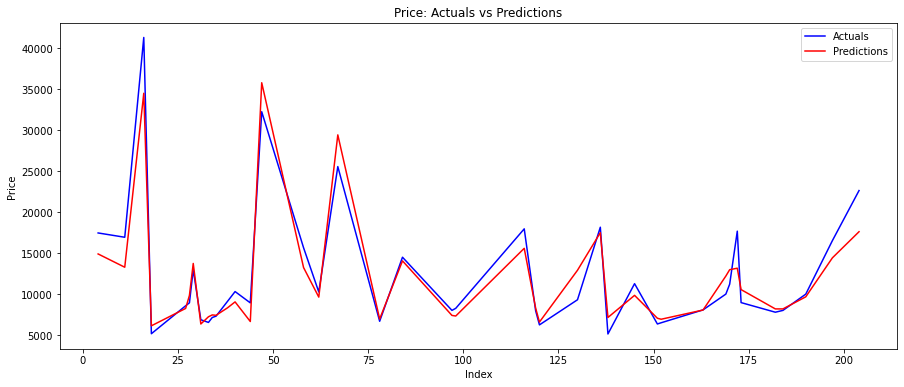

In [677]:
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_test_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')